In [1]:
#Лабораторная работа №1

In [2]:
#Задание 1.1 Преобразовать JSON-файл в CSV-файл

In [3]:
import pathlib
from pathlib import Path  
import os
import csv
import json.decoder
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import defaultdict
import networkx as nx
import numpy as np

In [4]:
def fileConvert():
    pathJSON = Path("JSON_files", "sales.json")  #путь для JSON-файла
    pathCSV = Path("CSV_files", "sales.csv")  #путь для CSV-файла
    
    if os.path.isfile(pathCSV): 
        os.remove(pathCSV)
    
    with open(pathJSON) as jsonfile:  #открытие JSON-файла 
        elements = json.load(jsonfile)
        
    header = ['item', 'country', 'year', 'sales']  #имена полей (заголовок)
        
    with open(pathCSV, 'a', newline = '') as csvfile:  #открытие CSV-файла для добавления строк ('a')
        
        writer = csv.DictWriter(csvfile, fieldnames = header)
        writer.writeheader()  
        
        for item in elements:
            countries = item["sales_by_country"]
            
            for country in countries:
                years = countries[country]
                
                for year in years:
                    writer.writerow({'item': f'{item["item"]}',
                                     'country': f'{country}',
                                     'year': f'{year}',
                                     'sales': f'{years[year]}'})

In [5]:
fileConvert()

In [6]:
#Задание 2.1 Вычислить функцию

In [7]:
#Данные, передаваемые в функцию
x = np.array([1, 2.5, 3.3])  
w = np.array([2.1, 7.8, 5.6])
b = 5

In [8]:
def f(x, w, b):
    return np.dot(x, w) + b

In [9]:
f(x, w, b)

45.08

In [10]:
#Задание 2.2 На отрезке [-5;5] построить графики функций

In [11]:
def draw():
    figure, ax = plt.subplots()
    
    x = np.linspace(-5, 5, 100)
    
    f = x - x**3 / 6 + x**5 / 120 - x**7 / 5040
    g = np.sin(x)
    
    ax.plot(x, f, label = "f(x)", color = "orange")
    ax.plot(x, g, label = "g(x)", color = "blue")
    
    plt.legend(loc = "upper center");
    plt.show()

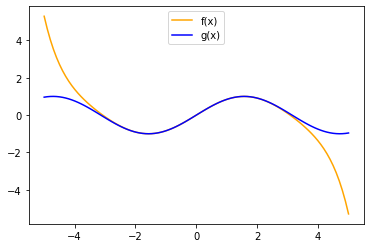

In [12]:
draw()

In [13]:
#Задание 2.3 Нарисовать в matplotlib окружность заданного радиуса r.

In [14]:
def circ(r):
    
    x = np.linspace(-r, r, 1000) 
    y = np.sqrt(r**2 - x**2)  #Из формулы окружности
    
    plt.plot(x, y, 'black')  #Верхняя половина окружности
    plt.plot(x,-y, 'black')  #Нижняя половина окружности
    
    ax = plt.gca()  #Получение текущих осей
    ax.set_aspect('equal') #Измерение y равно измерению x 
    
    plt.title("Окружность заданного радиуса")
    plt.show()  

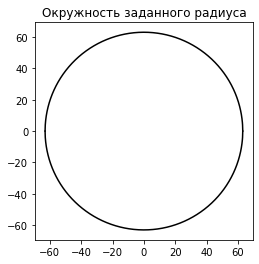

In [15]:
r = 63
circ(r)

In [16]:
#Задание 2.4 Написать функцию transformation_plot, принимающую на вход набор двумерных точек и квадратную матрицу размером 2x2. 
#Отрисуйте на одном графике оригинальные точки, на втором - точки после преобразования при помощи матрицы. 
#Отобразите точки таким образом, чтобы было понятно, какая из точек на первом графике соответствует какой точке на втором

In [17]:
def transformation_plot(points, matrix):
    new_points = np.dot(points, matrix.T)  #Преобразование точек 
    
    color = np.random.rand(len(points[:,0]), 4)  #Задание цвета для каждой точки из RGBA
    
    plt.scatter(points[:,0], points[:,1], c = color)  #Отрисовка оригинальных точек
    plt.title("Оригинальные точки")
    plt.show()
    
    plt.scatter(new_points[:,0], new_points[:,1], c = color)  #Отрисовка преобразованных точек
    plt.title("Точки после преобразования")
    plt.show()

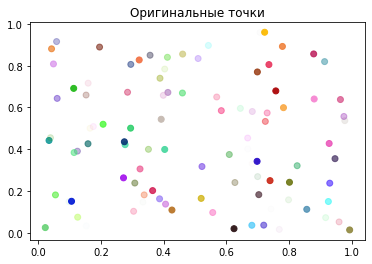

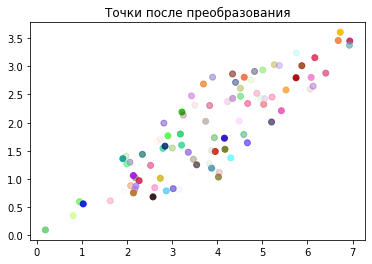

In [18]:
transformation_plot(np.random.random(size=(100, 2)), np.array([[4,4],[1,3]]))

In [19]:
#Задание 2.5. Задайте некоторую функцию одной переменной f(x) (x**2 + 3 * x - 4)
#Отрисуйте график её производной на выбранном интервале [a,b], не используя её аналитическое выражение.
#Сравните для проверки с аналитическим выражением производной.

In [20]:
def f(x):  #Заданная функция
    return (np.sin(x**3 + 5) / 6 * x**3 + 8)

def graphs():  #Функция отрисовки трёх графиков (оригинал, произвоная численным методом и аналитическим)
    
    fig, ax = plt.subplots()
    
    x = np.linspace(-10,10,100)
    dx = x[1] - x[0] #Приращение x
    dy = np.gradient(f(x), dx) #Приращение y
    
    plt.plot(x, f(x), color = 'gold')
    plt.title("График оригинальной функции ")
   # ax.set_xlim(-10, 10) 
   # ax.set_ylim(-5, 5) 
    plt.show()
    
    plt.plot(x, dy, color = 'darkorange')
    plt.title("График производной (численный метод) ")
    ax.set_xlim(-10, 10) 
    ax.set_ylim(-1.5, 1.5) 
    plt.show()
    
    plt.plot(x, (3*x**2 * np.cos(x**3 + 5) * (6*x**3 + 8) - 18*x**2 * np.sin(x**3 + 5)  / (6*x**3 + 8)**2), color = 'red')
    plt.title("График производной (аналитический метод) ")
    plt.show()

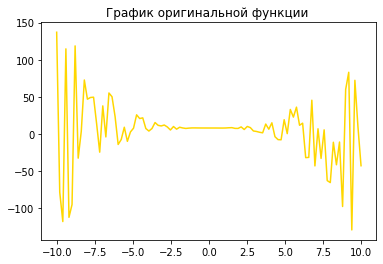

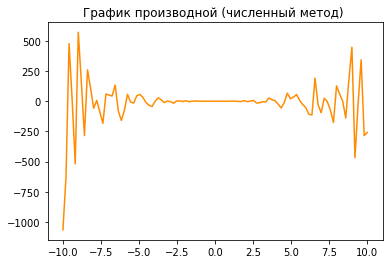

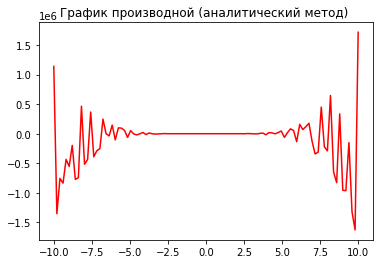

In [21]:
graphs()

In [22]:
#Задание 2.6. Дано множество векторов V размерности d. Дан вектор q такой же размерности. Определить:
#а) Пропорцию векторов v в V, для которых угол(v,q) < 90 градусов
#б) Пропорцию векторов v в V, для которых угол(v,q) < 30 градусов

In [23]:
def suitableAngle(V , q):
    
    counter_below90 = 0 #количество векторов, для которых угол(v,q) < 90 градусов
    counter_below30 = 0 #количество векторов, для которых угол(v,q) < 30 градусов
    
    vModules = np.linalg.norm(V, axis = 1) #модули(длины) векторов v из V 
    qModule = np.linalg.norm(q) #модуль(длина) вектора q
    
    angles = np.arccos(np.dot(V,q)  / (vModules * qModule))  
    
    counter_below90 = (np.degrees(angles) < 90).sum()
    counter_below30 = (np.degrees(angles) < 30).sum()
    
    proportionBelow90 = counter_below90 / len(V) 
    proportionBelow30 = counter_below30 / len(V) 
    
    return (proportionBelow90, proportionBelow30)

In [24]:
V = [[1,2], [2,5], [800, 10], [-6, 1]]
q = [5,5]
suitableAngle(V, q)

(0.75, 0.5)

In [25]:
#Задание 2.7. Дан гиперкуб и вписанная в него гиперсфера. 
#Через сэмплинг точек внутри гиперкуба, оценить отношение объёма гиперсферы к объёму гиперкуба. 
#Вывести график этой пропорции в зависимости от размерности пространства d.

In [26]:
def volumeRatios():
    
    volumeRatio = [] #Массив для хранения отношения объемов для измерений от 2 до 10
    
    for i in range(2, 10):  #Измерения от 2 до 10

        allPoints = np.random.uniform(-1, 1, size=(2000, i))  #Точки гиперкуба
        pointsSquares = np.sum(np.square(allPoints), axis = 1)  #Сумма квадратов координат точек
    
        pointsInsideTheSphere = np.sum(1 >= pointsSquares)  #Количество точек гиперкуба, попавших в гиперсферу
    
        volumeRatio.append(pointsInsideTheSphere / 2000) #Рассчёт отношения количества попавших точек к общему числу точек

    print(volumeRatio)
    
    figure, ax = plt.subplots()
    
    ax.set_ylim(0, 1)
    ax.set_xlim(2, 10)
    
    ax.set_xlabel('Размерность')
    ax.set_ylabel('Пропорция')
    
    ax.plot(range(2, 10), volumeRatio, 2000, color = 'lightcoral')
    
    plt.title("Отношение объёма гиперсферы к объёму гиперкуба в зависимости от размерности пространства")
    plt.show()  

[0.7685, 0.538, 0.3015, 0.1745, 0.087, 0.035, 0.0135, 0.0075]


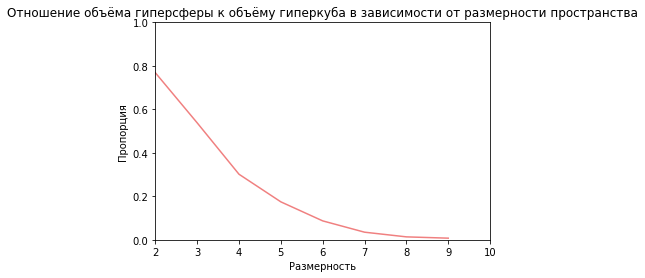

In [27]:
volumeRatios()

In [28]:
#Задание 2.8. Дана матрица X размером N * d. Напишите функцию, которая преобразует каждую i-й столбец матрицы
#Для d = 2, отрисуйте результат преобразования точек из np.random.multivariate_normal(mean=[1,2],cov=[[2,1],[1,3]]) 
#вместе с оригинальными точками.

In [29]:
def transformation(matrix):
    averageValue = np.mean(matrix, axis = 0)  #Среднее значение в столбце
    
    deviation = np.std(matrix, axis = 0)  #Стандартное отклонение в столбце
    
    difference = matrix - averageValue  #Разность значений и средних значений
    
    new_matrix = difference / deviation  #Матрица с новыми точками 
    return new_matrix

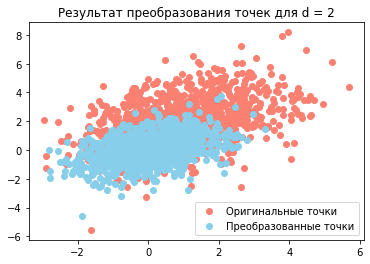

In [30]:
#Отрисовка результата преобразования точек для d = 2
points = np.random.multivariate_normal(mean=[1,2],cov=[[2,1],[1,3]], size=1000)
new_points = transformation(points)

fig, ax = plt.subplots()

ax.scatter(points[:, 0], points[:, 1], color = 'salmon', label = 'Оригинальные точки')
ax.scatter(new_points[:, 0], new_points[:, 1], color = 'skyblue', label = 'Преобразованные точки')
plt.legend()

plt.title('Результат преобразования точек для d = 2')
plt.show()

In [31]:
#Задание 3.2. Дан граф друзей из соцсети VK (vk.gml):
#Необходимо:
#1) Определить число уникальных пользователей
#2) Для каждого id пользователя определить число его друзей из данного графа. Вывести топ 15. 
#Учитывать неориентированность графа. 
#Посчитать среднее и медианное число друзей.
#3) Для всех возможных пар пользователей (декартова произведения):
#Для длин L 1..6 определить пропорцию пар пользователей, для которой кратчайший путь между пользователями в паре составляет L. 
#Определить пропорцию, для которой этот путь больше 6 (или не существует).
#Убедиться, что полученные пропорции суммируются в 1.

In [32]:
def vk_stats():
    graph =  nx.read_gml("GML_files/VK.gml")  #Чтение gml-файла 
    
    nodes = graph.nodes
    edges = graph.edges
    
    number_of_friends = np.array([])  #Массив для хранения числа друзей каждого пользователя
    for node in nodes:
        number_of_friends = np.append(number_of_friends, len(graph.edges(node)))
        
    ids = np.argsort(number_of_friends)[::-1]  #Массив для хранения id пользователей (отсортирован по количеству друзей - от наибольшего количества к наименьшему)
    
    print ("Число уникальных пользоватлей: ", len(nodes))
    print('Cpeднее число друзей: ', np.average(number_of_friends))
    print('Медианное число друзей: ', np.median(number_of_friends))
    print('Топ-15: ')
    for i in range (15):  #Топ-15 
        print('id ' + str(list(nodes)[ids[i]]))

In [33]:
vk_stats()

Число уникальных пользоватлей:  3766
Cpeднее число друзей:  21.98884758364312
Медианное число друзей:  15.0
Топ-15: 
id 154572605
id 136435809
id 34847138
id 1997236
id 472893795
id 270418723
id 246825563
id 120109289
id 83372852
id 94780691
id 63962118
id 150491520
id 94509311
id 122784747
id 41459412
